### List of Data Analysis Operations Performed

1. Load the Data in the file - "assignment_python.csv" given as a .csv, using Pandas 
2. Understand the data using the columns given (metadata descriptions below)
3. Calculate the time period in days for which the customer was active (days from first deposit date) and enter the value in a new column titled 'Customer Lifetime' & what is the lifetime in days for customer ID - 5371454
4. Find the city & country with the highest number of unique customers
5. Find the unique count of players in each country (in descending order) & specify the number of unique players from the city - Kayseri
6. Which city gives the third highest average first_deposit_amount and what is the average amount? 
7. Plot a graph showing the city and the descending unique count of the unique customers (upto the top 40 cities by the unique count) and make a large plot (clearly visible) and make sure the title and labels are clearly visible.
8. Plot the conversion for each month of the data (Conversion % = No. of unique First Deposits in the month / No. of unique Registrations in the month) Here, the conversion percentage should be reflected in red, and the labels in the X-axis should be year & month out of the Deposit Dates.
9. What was the conversion rate in June 2022, limit the answer to 2 decimal places. (in %)
10. Make a copy of the original data in the file assignment_python as a pandas dataframe called 'df_ft' and generate the following columns:
    1. week of day column from the deposit date column
    2. descriptive statistics of the table
    3. make a column with the first_deposit_amounts binned in bins of 500 and reflected against every customer ID (for example, someone with a first deposit amount of 880 should reflect in the binning column as '500-1000'.
11. Find a 7 days moving average of number of registrations. (calculating an average of the T-7 days for every week's total registrations)

Descriptions:
- IDCUSTOMER = Unique Identifier for a customer
- GENDER, CITY, COUNTRY = Self Explanatory
- FIRST DEPOSIT AMOUNT = Customer's first deposit amount
- REGISTRATION DATE = The date of registration of the customer

- DEPOSIT DATE = The date of the first deposit made by the registered customer

In [ ]:
#Question 1: Load the Data in the file - "assignment_python.csv" given as a .csv using Pandas

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Question 2: Understand the data using the columns given (metadata descriptions below)

In [32]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)
df = pd.read_csv('assignment_python.csv')
#The columns REGISTRATION_DATE and DEPOSIT_DATE are of type Object, we need to convert them to datetime for further analysis.
df['REGISTRATION_DATE'] = pd.to_datetime(df['REGISTRATION_DATE'])
df['DEPOSIT_DATE'] = pd.to_datetime(df['DEPOSIT_DATE'])
print(df.head().to_markdown(index = False, numalign = "left", stralign = "left"))

| IDCUSTOMER   | GENDER   | CITY    | COUNTRY   | FIRST_DEPOSIT_AMOUNT   | REGISTRATION_DATE   | DEPOSIT_DATE        |
|:-------------|:---------|:--------|:----------|:-----------------------|:--------------------|:--------------------|
| 5075649      | M        | ankara  | Turkey    | 100                    | 2009-01-10 00:00:00 | 2022-06-05 00:00:00 |
| 5176235      | M        | elazığ  | Turkey    | 400                    | 2009-03-01 00:00:00 | 2022-02-11 00:00:00 |
| 5249140      | M        | izmir   | Turkey    | 200                    | 2009-04-06 00:00:00 | 2022-05-02 00:00:00 |
| 5300998      | M        | Üsküdar | Turkey    | 100                    | 2009-05-02 00:00:00 | 2022-02-11 00:00:00 |
| 5371454      | M        | sakarya | Turkey    | 880                    | 2009-06-07 00:00:00 | 2022-05-29 00:00:00 |


In [ ]:
#Question 3: Calculate the time period in days for which the customer was active (days from first deposit date) and enter the value in a new column titled 'Customer Lifetime' & what is the lifetime in days for customer ID - 5371454

In [33]:
df['Customer Lifetime'] = (df['DEPOSIT_DATE'] - df['REGISTRATION_DATE']).dt.days
customer_lifetime = df[df['IDCUSTOMER'] == 5371454]['Customer Lifetime']

print(f"The Lifetime in Days for Customer ID 5371454 is: {customer_lifetime.iloc[0]}")

The Lifetime in Days for Customer ID 5371454 is: 4739


In [ ]:
#Question 4: Find the city & country with the highest number of unique customers

In [34]:
grouped_data = df.groupby(['CITY', 'COUNTRY'])['IDCUSTOMER'].nunique().to_frame()
grouped_data = grouped_data.sort_values(by = 'IDCUSTOMER', ascending = False)

result = grouped_data.reset_index()
result = result.rename(columns = {'IDCUSTOMER': 'Unique Customers Count'})

print(result.head(1).to_markdown(index = False, numalign="left", stralign="left"))

| CITY     | COUNTRY   | Unique Customers Count   |
|:---------|:----------|:-------------------------|
| İstanbul | Turkey    | 4770                     |


In [ ]:
#Question 5: Find the unique count of players in each country (in descending order) & specify the number of unique players from the city - Kayseri

In [35]:
country_counts = df.groupby('COUNTRY')['IDCUSTOMER'].nunique()
country_counts = country_counts.sort_values(ascending=False).reset_index()
country_counts = country_counts.rename(columns={'IDCUSTOMER': 'Unique Player Count'})

print("Unique count of players in each country(descending order):\n")
print(country_counts.to_markdown(index=False, numalign='left', stralign="left"))

kayseri_players = df[df['CITY'] == 'Kayseri']['IDCUSTOMER'].nunique()
print(f"\n Number of unique players from Kayseri: {kayseri_players}")

Unique count of players in each country(descending order):

| COUNTRY   | Unique Player Count   |
|:----------|:----------------------|
| Turkey    | 22065                 |

 Number of unique players from Kayseri: 369


In [ ]:
#Question 6: Which city gives the third highest average first_deposit_amount and what is the average amount?

In [36]:
city_average_deposit = df.groupby('CITY')['FIRST_DEPOSIT_AMOUNT'].mean()
city_average_deposit = city_average_deposit.sort_values(ascending=False)

result = city_average_deposit.reset_index()
result = result.rename(columns={'FIRST_DEPOSIT_AMOUNT':'Average First Deposit Amount'})

print(result.iloc[2:3].to_markdown(index=False, numalign ="left", stralign ="left"))

| CITY          | Average First Deposit Amount   |
|:--------------|:-------------------------------|
| sarıçam/Adana | 9000                           |


In [ ]:
#Question 7: Plot a graph showing the city and the descending unique count of the unique customers (upto the top 40 cities by the unique count) and make a large plot (clearly visible) and make sure the title and labels are clearly visible.

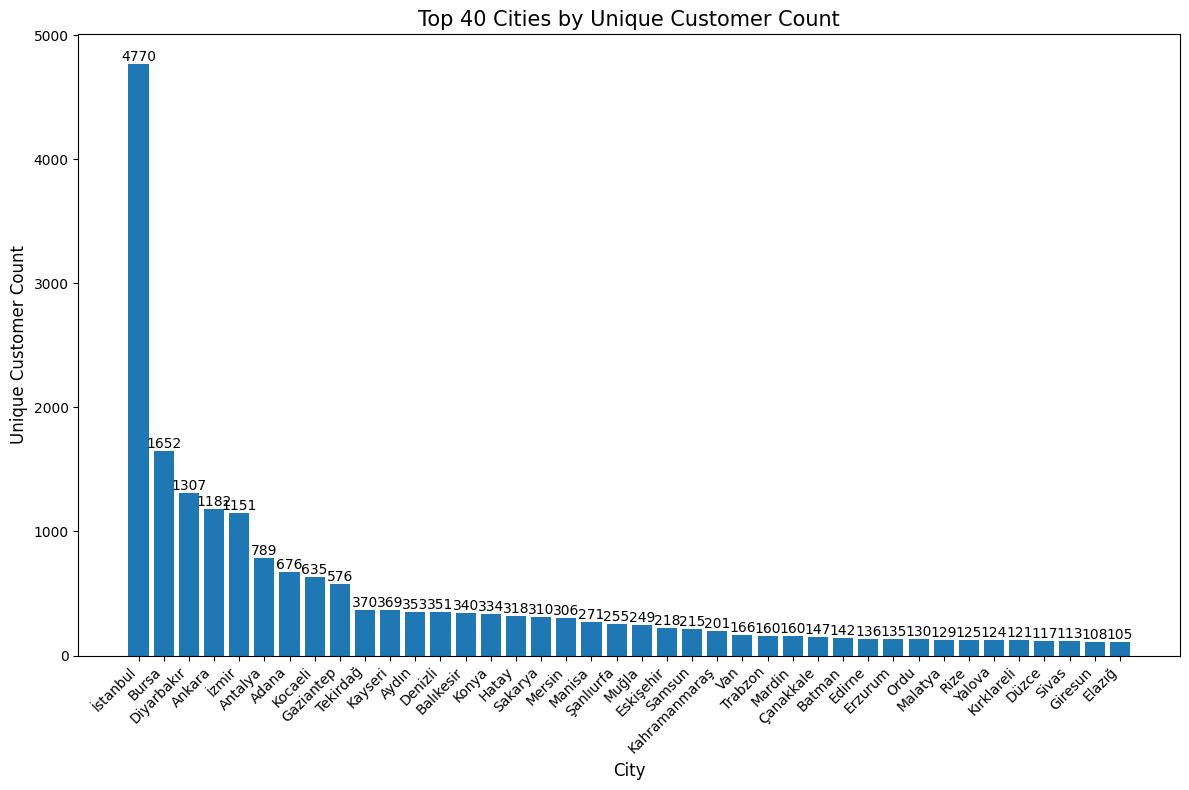

In [18]:
top_40_cities = df.groupby("CITY")["IDCUSTOMER"].nunique().sort_values(ascending=False).head(40)
x_values = top_40_cities.index.to_list()

plt.figure(figsize=(12,8))
bars = plt.bar(x_values, top_40_cities.values)
plt.xlabel('City', fontsize=12)
plt.ylabel('Unique Customer Count', fontsize=12)
plt.title('Top 40 Cities by Unique Customer Count', fontsize=15)
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(int(height)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
#Question 8: Plot the conversion for each month of the data (Conversion % = No. of unique First Deposits in the month / No. of unique Registrations in the month) Here, the conversion percentage should be reflected in red, and the labels in the X-axis should be year & month out of the Deposit Dates.

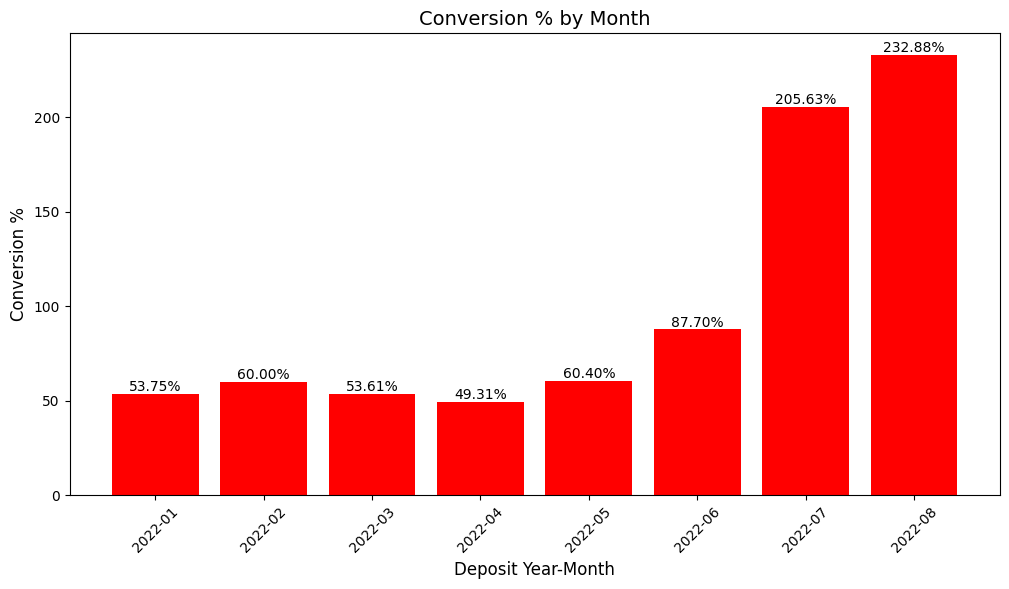

In [19]:
df['DEPOSIT_YEAR_MONTH'] = df['DEPOSIT_DATE'].dt.to_period('M')
unique_first_deposits_per_month = df.groupby('DEPOSIT_YEAR_MONTH')['FIRST_DEPOSIT_AMOUNT'].nunique()
unique_registrations_per_month = df.groupby('DEPOSIT_YEAR_MONTH')['REGISTRATION_DATE'].nunique()
conversion_percentage = (unique_first_deposits_per_month / unique_registrations_per_month) * 100

conversion_df = pd.DataFrame({'Conversion %': conversion_percentage})
conversion_df.index = conversion_df.index.astype(str)

plt.figure(figsize=(12,6))
bars = plt.bar(conversion_df.index, conversion_df['Conversion %'], color = 'red')
plt.xlabel('Deposit Year-Month', fontsize = 12)
plt.ylabel('Conversion %', fontsize = 12)
plt.title('Conversion % by Month', fontsize=14)
plt.xticks(rotation = 45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha = 'center', va = 'bottom')

In [ ]:
#Question 9: What was the conversion rate in June 2022, limit the answer to 2 decimal places. (in %)

In [24]:
june_2022_conversion = conversion_df[conversion_df.index == '2022-06']

if not june_2022_conversion.empty:
    conversion_rate = june_2022_conversion['Conversion %'].iloc[0]
    print(f"The conversion rate in June 2022 was: {conversion_rate:.2f}%")

The conversion rate in June 2022 was: 87.70%


In [ ]:
#Question 10: 10. Make a copy of the original data in the file assignment_python as a pandas dataframe called 'df_ft' and generate the following columns: 1) week of day column from the deposit date column. 2)descriptive statistics of the table. 3)make a column with the first_deposit_amounts binned in bins of 500 and reflected against every customer ID (for example, someone with a first deposit amount of 880 should reflect in the binning column as '500-1000'.

In [30]:
df_ft = df.copy()
df_ft['WEEKDAY'] = df_ft['DEPOSIT_DATE'].dt.strftime('%A')

stats = df_ft.describe()
print("\n Descriptive Statistics:\n")
print(stats.to_markdown())

bins = range(0, int(df_ft['FIRST_DEPOSIT_AMOUNT'].max()) + 500, 500)
df_ft['BINNED_DEPOSIT_AMOUNT'] = pd.cut(df_ft['FIRST_DEPOSIT_AMOUNT'], bins = bins, right = False, precision = 0)

print("\n Updated Dataframe:\n")
print(df_ft.head().to_markdown(index=False, numalign="left", stralign="left"))


 Descriptive Statistics:

|       |      IDCUSTOMER |   FIRST_DEPOSIT_AMOUNT | REGISTRATION_DATE             | DEPOSIT_DATE                  |   Customer Lifetime |
|:------|----------------:|-----------------------:|:------------------------------|:------------------------------|--------------------:|
| count | 22065           |              22065     | 22065                         | 22065                         |          22065      |
| mean  |     1.38059e+08 |                284.807 | 2022-01-20 00:15:59.347382784 | 2022-04-21 08:52:32.141400576 |             91.3587 |
| min   |     5.07565e+06 |                  0.38  | 2009-01-10 00:00:00           | 2022-01-01 00:00:00           |              0      |
| 25%   |     1.4591e+08  |                 70     | 2022-02-11 00:00:00           | 2022-02-26 00:00:00           |              0      |
| 50%   |     1.46514e+08 |                100     | 2022-04-05 00:00:00           | 2022-04-15 00:00:00           |              0      |


In [ ]:
#Question 11: Find a 7 days moving average of number of registrations. (calculating an average of the T-7 days for every week's total registrations)

In [22]:
registrations_per_day = df.groupby('REGISTRATION_DATE')['IDCUSTOMER'].nunique()
moving_average = registrations_per_day.rolling(window=7).mean()
moving_average.index = pd.to_datetime(moving_average.index)
moving_average = moving_average.reset_index().rename(columns={0: '7-day Moving Average'})
moving_average.dropna(inplace=True)

print(moving_average.head().to_markdown(index=False, numalign="left", stralign="left"))

| REGISTRATION_DATE   | IDCUSTOMER   |
|:--------------------|:-------------|
| 2009-11-10 00:00:00 | 1            |
| 2009-12-03 00:00:00 | 1            |
| 2009-12-17 00:00:00 | 1            |
| 2010-01-17 00:00:00 | 1            |
| 2010-01-29 00:00:00 | 1            |
